#  uas pendat

## 1. 🧐 Data Understanding (Pemahaman Data)
Tahap ini adalah fondasi dari setiap proyek machine learning. Tujuannya adalah untuk "berkenalan" secara mendalam dengan data yang kita miliki sebelum melakukan tindakan apa pun. Anggap saja tahap ini seperti seorang detektif yang pertama kali tiba di lokasi kejadian; ia mengamati, mencatat, dan mencoba memahami konteksnya terlebih dahulu.

link sumber data: https://archive.ics.uci.edu/dataset/277/thoracic+surgery+data

Aktivitas Utama:

Analisis Statistik Deskriptif: Menghitung metrik dasar untuk mendapatkan gambaran umum data.

Untuk data numerik: Rata-rata (mean), median, standar deviasi (std), nilai minimum (min), dan maksimum (max). Perintah .describe() pada pandas sangat berguna di sini.

Untuk data kategorikal: Menghitung jumlah unik (unique) dan frekuensi setiap kategori (value_counts).

Visualisasi Data: Mengubah angka menjadi gambar agar pola lebih mudah terlihat.

Histogram atau KDE Plot: Untuk melihat distribusi setiap fitur numerik. Apakah datanya miring (skewed)? Apakah ada lebih dari satu puncak (bimodal)?

Box Plot: Sangat efektif untuk mengidentifikasi adanya outliers atau pencilan (data yang nilainya sangat ekstrem dibanding yang lain).

Bar Chart: Untuk melihat frekuensi dari setiap kategori pada data kategorikal.

Correlation Matrix (Heatmap): Untuk melihat hubungan atau korelasi antar fitur numerik. Apakah ada fitur yang saling berhubungan kuat?

In [1]:
# Instalasi library yang mungkin belum ada di lingkungan Anda
!pip install ucimlrepo scikit-learn pandas matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


🔄 Memuat dataset Palmer Penguins...


✅ Dataset berhasil dimuat.

--- 1. Tampilan 5 Baris Pertama Data ---


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female



--- 2. Informasi Umum & Tipe Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

--- 3. Statistik Deskriptif (Kolom Numerik) ---


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000



--- 4. Distribusi Spesies (Target) ---
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

--- 5. Visualisasi Data ---


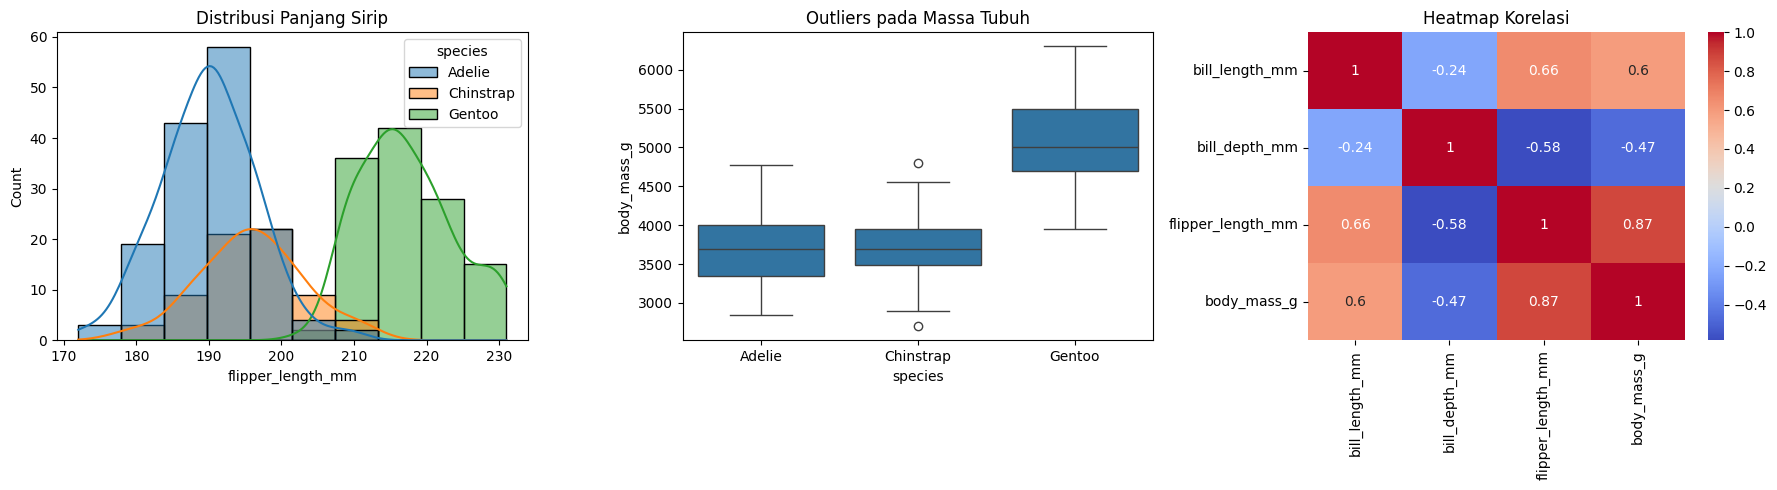

In [2]:
# Impor library yang diperlukan untuk tahap ini
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset 'penguins' yang sudah tersedia di library seaborn
print("🔄 Memuat dataset Palmer Penguins...")
df = sns.load_dataset('penguins')
print("✅ Dataset berhasil dimuat.")

# --- Aktivitas Data Understanding ---

# 1. Melihat 5 baris pertama untuk mendapatkan gambaran awal
print("\n--- 1. Tampilan 5 Baris Pertama Data ---")
display(df.head())

# 2. Mendapatkan informasi umum (tipe data, jumlah data non-null)
print("\n--- 2. Informasi Umum & Tipe Data ---")
df.info()

# 3. Menghitung statistik deskriptif untuk kolom numerik
print("\n--- 3. Statistik Deskriptif (Kolom Numerik) ---")
display(df.describe())

# 4. Menghitung jumlah untuk setiap spesies (kolom target)
print("\n--- 4. Distribusi Spesies (Target) ---")
print(df['species'].value_counts())

# 5. Membuat visualisasi untuk pemahaman lebih dalam
print("\n--- 5. Visualisasi Data ---")
plt.figure(figsize=(18, 5))

# Plot 1: Histogram untuk melihat distribusi 'flipper_length_mm'
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='flipper_length_mm', hue='species', kde=True)
plt.title('Distribusi Panjang Sirip')

# Plot 2: Box plot untuk melihat outliers pada 'body_mass_g'
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='species', y='body_mass_g')
plt.title('Outliers pada Massa Tubuh')

# Plot 3: Heatmap untuk melihat korelasi antar fitur numerik
plt.subplot(1, 3, 3)
# Hanya pilih kolom numerik untuk korelasi
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')

plt.tight_layout()
plt.show()

## 2. 🛠️ Preprocessing (Pra-pemrosesan Data)
Data di dunia nyata seringkali "kotor", tidak lengkap, dan tidak dalam format yang bisa langsung diterima oleh model machine learning. Tahap preprocessing adalah proses membersihkan dan mentransformasi data mentah menjadi data yang "matang" dan siap untuk dimodelkan. Ibarat seorang koki, ini adalah proses mise en place—menyiapkan semua bahan sebelum mulai memasak.

Aktivitas Utama:

Menangani Data yang Hilang (Missing Values): Model tidak bisa bekerja dengan data yang kosong. Opsi yang umum adalah:

Imputasi: Mengisi nilai yang hilang dengan nilai statistik lain (misalnya, mean, median, atau modus/nilai yang paling sering muncul).

Menghapus: Menghapus baris atau kolom yang memiliki terlalu banyak data hilang (dilakukan dengan hati-hati).

Menangani Data Kategorikal (Categorical Data): Model machine learning pada dasarnya adalah mesin matematika; mereka butuh angka, bukan teks.

One-Hot Encoding: Mengubah kolom kategori (misal: 'Warna' dengan isi 'Merah', 'Biru') menjadi beberapa kolom biner baru ('Warna_Merah', 'Warna_Biru'). Ini adalah metode yang paling umum untuk fitur.

Label Encoding: Mengubah setiap kategori unik menjadi sebuah angka (misal: 'Rendah'=0, 'Sedang'=1, 'Tinggi'=2). Biasanya digunakan untuk variabel target.

Feature Scaling (Penskalaan Fitur): Menyamakan skala nilai dari berbagai fitur. Ini sangat penting untuk algoritma yang sensitif terhadap jarak seperti KNN atau SVM.

Standardization (StandardScaler): Mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.

Normalization (MinMaxScaler): Mengubah skala data ke rentang tertentu, biasanya antara 0 dan 1.

In [3]:
# Impor library yang diperlukan untuk tahap ini
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np

# --- Aktivitas Preprocessing ---

# 1. Memisahkan fitur (X) dan target (y)
# Kita akan memprediksi 'species' berdasarkan fitur lainnya
X = df.drop('species', axis=1)
y = df['species']

# Menghapus baris di mana targetnya kosong (jika ada, praktik yang baik)
# Untuk dataset ini, kolom 'species' tidak memiliki nilai kosong, tapi ini adalah langkah yang aman
if y.isnull().any():
    print("Menghapus baris dengan target kosong...")
    X = X[y.notna()]
    y = y[y.notna()]

# 2. Mengidentifikasi kolom numerik dan kategorikal secara otomatis
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Kolom Numerik Teridentifikasi: {numerical_cols}")
print(f"Kolom Kategorikal Teridentifikasi: {categorical_cols}")

# 3. Membagi data menjadi data latih dan data uji SEBELUM menerapkan pipeline
# Ini mencegah kebocoran informasi dari data uji ke data latih (data leakage)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nData dibagi menjadi {len(X_train)} baris data latih dan {len(X_test)} baris data uji.")


# 4. Membuat pipeline preprocessing
# Pipeline untuk data numerik: Isi nilai kosong dengan median, lalu skalakan
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk data kategorikal: Isi nilai kosong dengan modus, lalu lakukan One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan kedua pipeline menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

print("\n✅ Pipeline preprocessing berhasil dibuat dan siap digunakan.")

Kolom Numerik Teridentifikasi: ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
Kolom Kategorikal Teridentifikasi: ['island', 'sex']

Data dibagi menjadi 275 baris data latih dan 69 baris data uji.

✅ Pipeline preprocessing berhasil dibuat dan siap digunakan.


## 3. 🧠 Modelling (Pemodelan)
Ini adalah inti dari proses machine learning, di mana kita memilih algoritma dan "melatihnya" menggunakan data yang telah kita siapkan. Tujuannya adalah agar algoritma dapat belajar pola yang ada di dalam data. Proses ini mirip seperti mengajari seorang siswa dengan memberinya materi pelajaran dan soal-soal latihan.

Langkah-langkah Kunci:

Membagi Data (Data Splitting): Ini adalah langkah krusial untuk evaluasi yang adil. Kita membagi data menjadi:

Data Latih (Training Set): Bagian terbesar dari data (misal: 80%) yang digunakan untuk "mengajari" model. Model akan belajar pola dari data ini.

Data Uji (Test Set): Bagian kecil dari data (misal: 20%) yang disembunyikan dari model selama proses latihan. Data ini akan digunakan sebagai "ujian akhir" untuk mengukur performa model pada data yang belum pernah dilihat sebelumnya.

Memilih Algoritma: Pemilihan algoritma bergantung pada jenis masalah:

Klasifikasi (memprediksi kategori, misal: 'Spam' atau 'Bukan Spam'): Logistic Regression, K-Nearest Neighbors (KNN), Support Vector Machine (SVM), Decision Tree, Random Forest.

Regresi (memprediksi nilai numerik, misal: harga rumah): Linear Regression, Ridge, Lasso, Decision Tree, Random Forest.

Melatih Model (Model Fitting): Ini adalah proses di mana model "belajar" dari data latih. Secara teknis, ini adalah proses optimisasi di mana model mencoba menemukan parameter internal terbaik untuk memetakan hubungan antara fitur (input) dan target (output). Di scikit-learn, proses ini dilakukan dengan memanggil metode .fit(X_train, y_train).

In [4]:
# Impor algoritma yang akan digunakan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Tetap impor untuk referensi/jika ingin ditambah
from sklearn.metrics import accuracy_score

# --- Aktivitas Modelling & Perbandingan ---

# 1. Mendefinisikan daftar model yang akan kita bandingkan
# Kita akan menaruhnya dalam sebuah dictionary agar mudah diakses
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}
print("Model yang akan dibandingkan:", list(models.keys()))

# 2. Melakukan iterasi untuk melatih dan menguji setiap model
results = {} # Dictionary untuk menyimpan hasil
print("\n🔄 Memulai proses pelatihan dan perbandingan...")

for model_name, model in models.items():
    # Membuat pipeline lengkap untuk setiap model: (Preprocessor -> Classifier)
    full_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # Melatih pipeline
    full_pipeline.fit(X_train, y_train)

    # Melakukan prediksi pada data uji
    y_pred = full_pipeline.predict(X_test)

    # Menghitung akurasi
    accuracy = accuracy_score(y_test, y_pred)

    # Menyimpan hasil dan pipeline yang sudah terlatih
    results[model_name] = {
        'accuracy': accuracy,
        'pipeline': full_pipeline
    }

    print(f"   - Akurasi untuk '{model_name}': {accuracy:.2%}")

# 3. Menentukan model terbaik berdasarkan akurasi tertinggi
best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_accuracy = results[best_model_name]['accuracy']
best_pipeline = results[best_model_name]['pipeline']

print(f"\n🏆 Model terbaik adalah '{best_model_name}' dengan akurasi {best_accuracy:.2%}.")

Model yang akan dibandingkan: ['K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Decision Tree']

🔄 Memulai proses pelatihan dan perbandingan...
   - Akurasi untuk 'K-Nearest Neighbors': 98.55%
   - Akurasi untuk 'Gaussian Naive Bayes': 72.46%
   - Akurasi untuk 'Decision Tree': 100.00%

🏆 Model terbaik adalah 'Decision Tree' dengan akurasi 100.00%.


## 4. ✅ Evaluasi (Evaluation)
Setelah model dilatih, bagaimana kita tahu seberapa bagus performanya? Tahap evaluasi bertujuan untuk mengukur kinerja model secara objektif, terutama pada data uji yang belum pernah dilihatnya. Ini seperti memberikan nilai pada ujian akhir siswa untuk melihat apakah ia benar-benar paham atau hanya menghafal materi.

Metrik Evaluasi Umum:

Untuk Masalah Klasifikasi:

Akurasi (Accuracy): Persentase prediksi yang benar dari total data. Ini adalah metrik yang paling intuitif, tetapi bisa menyesatkan jika datanya tidak seimbang (imbalanced).

Confusion Matrix: Sebuah tabel yang merangkum performa model. Ini menunjukkan berapa banyak prediksi yang Benar Positif (TP), Benar Negatif (TN), Salah Positif (FP), dan Salah Negatif (FN).

Precision: Dari semua yang diprediksi sebagai 'Positif', berapa persen yang benar-benar 'Positif'? TP / (TP + FP). Berguna saat kita ingin menghindari kesalahan false positive.

Recall (Sensitivity): Dari semua yang seharusnya 'Positif', berapa persen yang berhasil kita prediksi? TP / (TP + FN). Berguna saat kita ingin menghindari kesalahan false negative.

F1-Score: Rata-rata harmonik dari Precision dan Recall, memberikan satu angka yang menyeimbangkan keduanya.

Untuk Masalah Regresi:

Mean Absolute Error (MAE): Rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi.

Mean Squared Error (MSE) / Root Mean Squared Error (RMSE): Mirip dengan MAE tetapi memberikan bobot lebih pada kesalahan besar.

--- Hasil Evaluasi Mendalam untuk 'Decision Tree' ---

1. Laporan Klasifikasi Mendetail:
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
   Chinstrap       1.00      1.00      1.00        14
      Gentoo       1.00      1.00      1.00        25

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

2. Menampilkan Confusion Matrix...


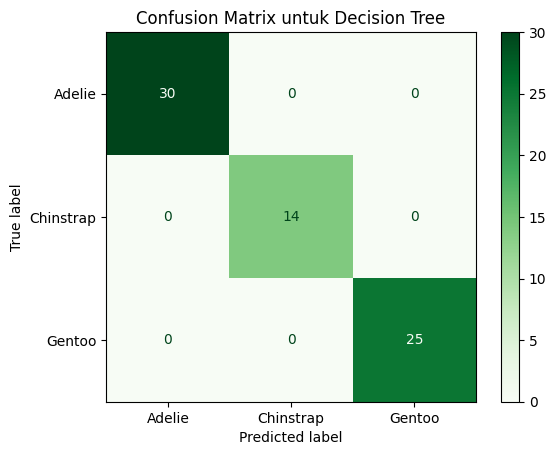


3. Menganalisis Fitur Penting (jika memungkinkan)...


/tmp/ipykernel_12755/1408900373.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')


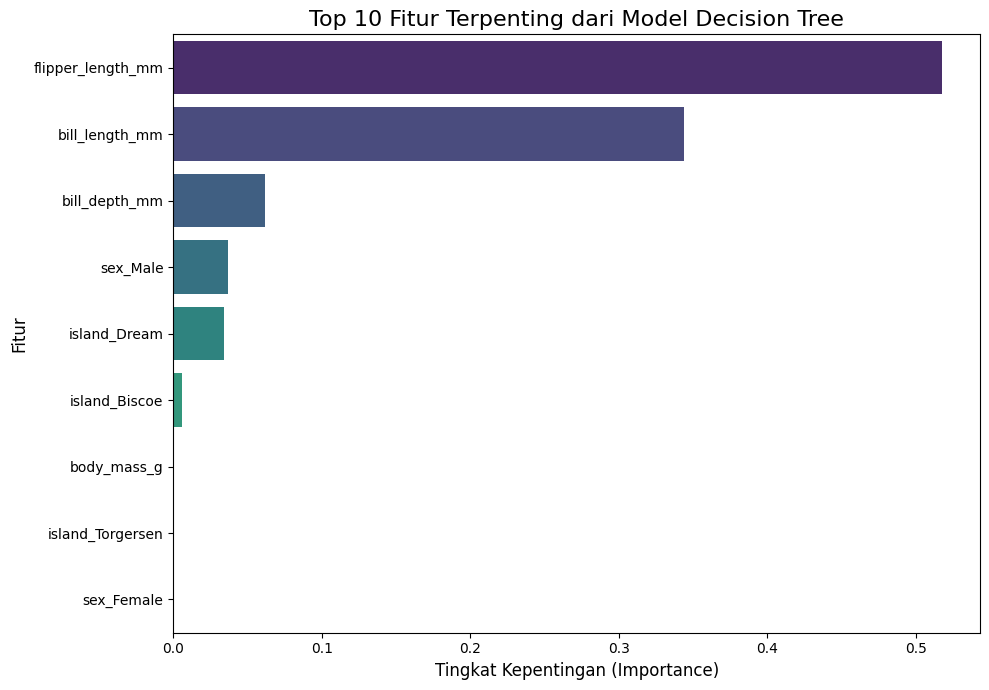

In [5]:
# Impor metrik evaluasi yang diperlukan
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import numpy as np # Diperlukan untuk analisis fitur penting

# --- Aktivitas Evaluasi Mendalam pada Model Terbaik ---

print(f"--- Hasil Evaluasi Mendalam untuk '{best_model_name}' ---")

# 1. Menggunakan pipeline terbaik untuk membuat prediksi
y_pred_best = best_pipeline.predict(X_test)

# 2. Mencetak Laporan Klasifikasi (Precision, Recall, F1-Score)
print("\n1. Laporan Klasifikasi Mendetail:")
print(classification_report(y_test, y_pred_best))

# 3. Menampilkan Confusion Matrix dari model terbaik
print("2. Menampilkan Confusion Matrix...")
ConfusionMatrixDisplay.from_estimator(best_pipeline, X_test, y_test, cmap='Greens')
plt.title(f'Confusion Matrix untuk {best_model_name}')
plt.show()

# 4. (Opsional) Menampilkan Fitur Terpenting jika modelnya adalah Decision Tree
# Analisis ini tidak berlaku untuk KNN atau Naive Bayes
print("\n3. Menganalisis Fitur Penting (jika memungkinkan)...")
if isinstance(best_pipeline.named_steps['classifier'], DecisionTreeClassifier):
    try:
        # Mengambil nama fitur setelah OneHotEncoding
        ohe_feature_names = best_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
        # Menggabungkan dengan nama fitur numerik
        all_feature_names = np.concatenate([np.array(numerical_cols), ohe_feature_names])

        # Mengambil nilai importance dari model di dalam pipeline
        importances = best_pipeline.named_steps['classifier'].feature_importances_

        # Membuat DataFrame untuk visualisasi
        feature_importance_df = pd.DataFrame({'feature': all_feature_names, 'importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False).head(10) # Ambil 10 teratas

        # Visualisasi
        plt.figure(figsize=(10, 7))
        sns.barplot(x='importance', y='feature', data=feature_importance_df, palette='viridis')
        plt.title(f'Top 10 Fitur Terpenting dari Model {best_model_name}', fontsize=16)
        plt.xlabel('Tingkat Kepentingan (Importance)', fontsize=12)
        plt.ylabel('Fitur', fontsize=12)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"   - Gagal membuat visualisasi fitur penting: {e}")
else:
    print(f"   - Model '{best_model_name}' tidak mendukung analisis 'feature importance'.")